<a href="https://colab.research.google.com/github/anjuunni/Sample/blob/main/Happiness_Index_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_excel("Happinessindex.xls")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [ ]:
df=df.drop(['Standard error of ladder score','upperwhisker','lowerwhisker','Logged GDP per capita','Ladder score in Dystopia','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption','Dystopia + residual'],axis=1)

In [ ]:
df.rename(columns={'Regional indicator':'Region','Ladder score': 'Score', 'Explained by: Log GDP per capita': 'GDP per capita'}, inplace=True)

In [ ]:
df.insert(0, 'Overall rank', range(1, 1 + len(df)))

In [ ]:
df.head()

,Overall rank,Country name,Region,Score,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,GDP per capita
0,1,Finland,Western Europe,7.8421,0.953603,72.000000,0.949268,-0.097760,0.185846,1.446356
1,2,Denmark,Western Europe,7.6195,0.954410,72.699753,0.945639,0.030109,0.178838,1.501548
2,3,Switzerland,Western Europe,7.5715,0.941742,74.400101,0.918788,0.024629,0.291698,1.565899
3,4,Iceland,Western Europe,7.5539,0.982938,73.000000,0.955123,0.160274,0.672865,1.482190
4,5,Netherlands,Western Europe,7.4640,0.941601,72.400116,0.913116,0.175404,0.337938,1.501072


In [ ]:
df[:1]['Country name']

0    Finland
Name: Country name, dtype: object

In [ ]:
df[-1:]['Country name']

148    Afghanistan
Name: Country name, dtype: object

In [ ]:
import seaborn as sns

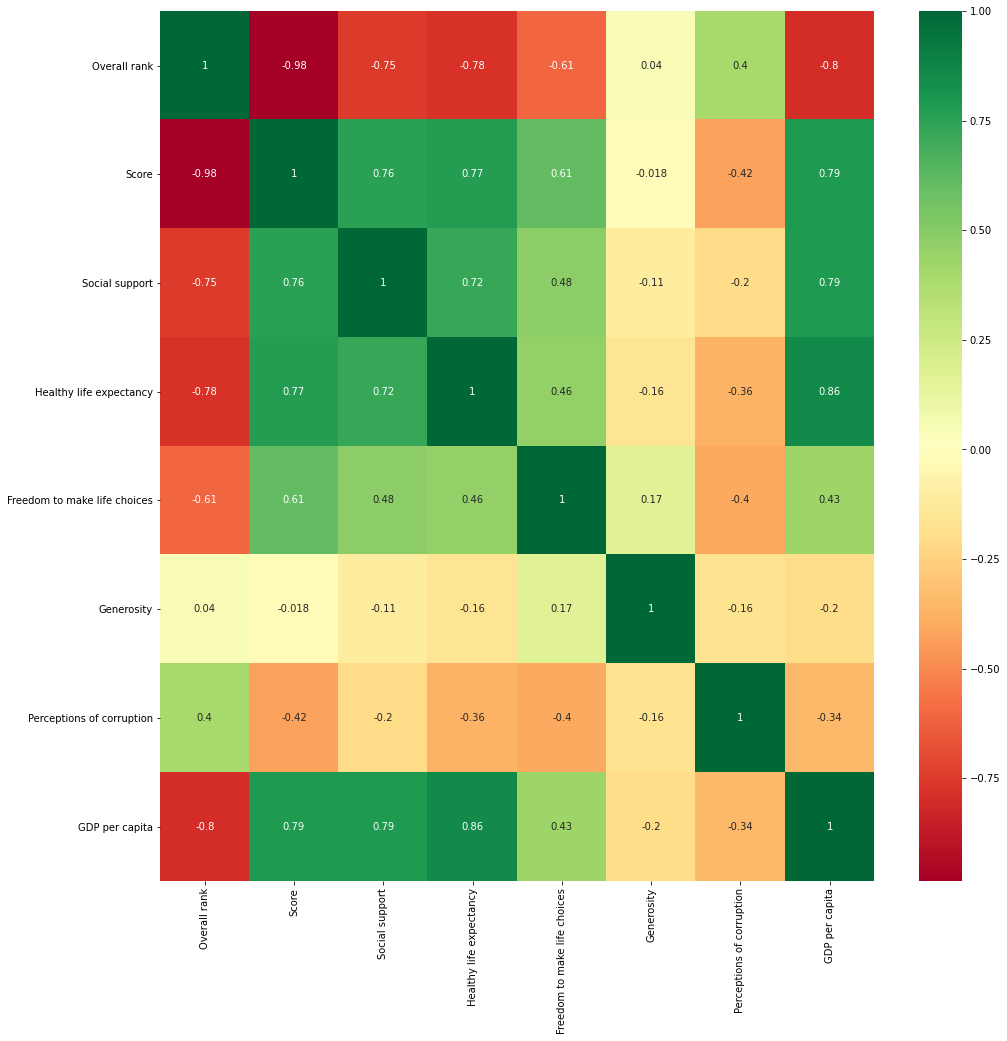

In [ ]:
fig = plt.figure(figsize=(16, 16))

fig.set_facecolor('white')

sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

In [ ]:
df_corr=df[['Score','Social support','Healthy life expectancy','Freedom to make life choices','GDP per capita']]

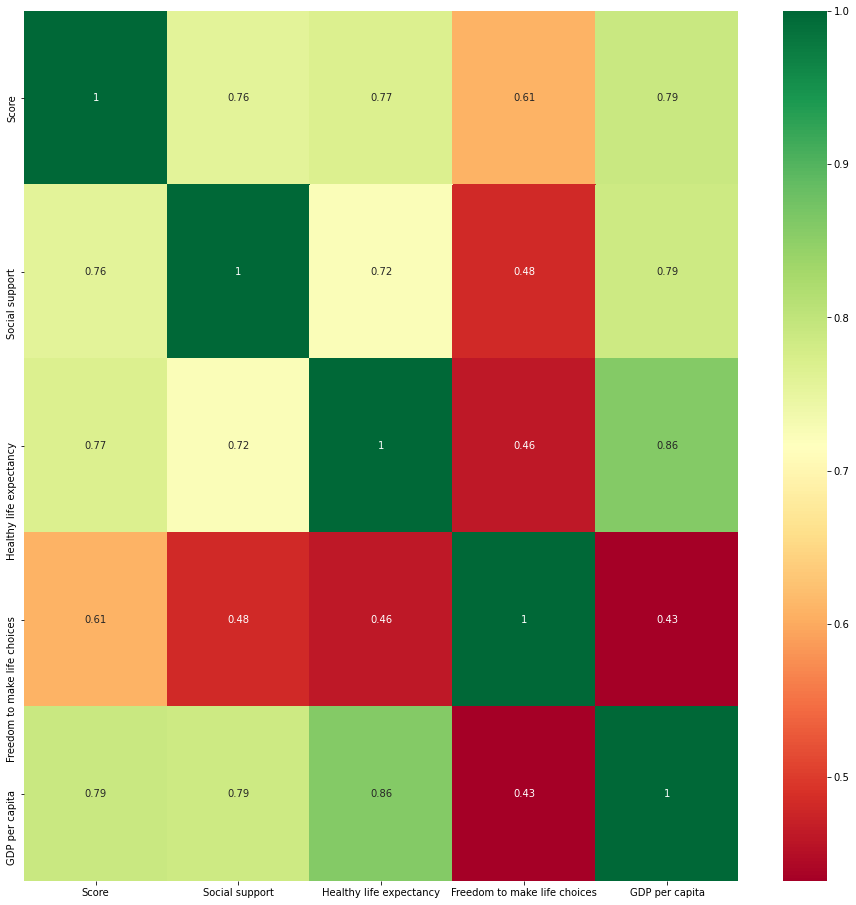

In [ ]:
fig = plt.figure(figsize=(16, 16))

fig.set_facecolor('white')

sns.heatmap(df_corr.corr(), annot=True, cmap="RdYlGn")

<Figure size 720x432 with 0 Axes>

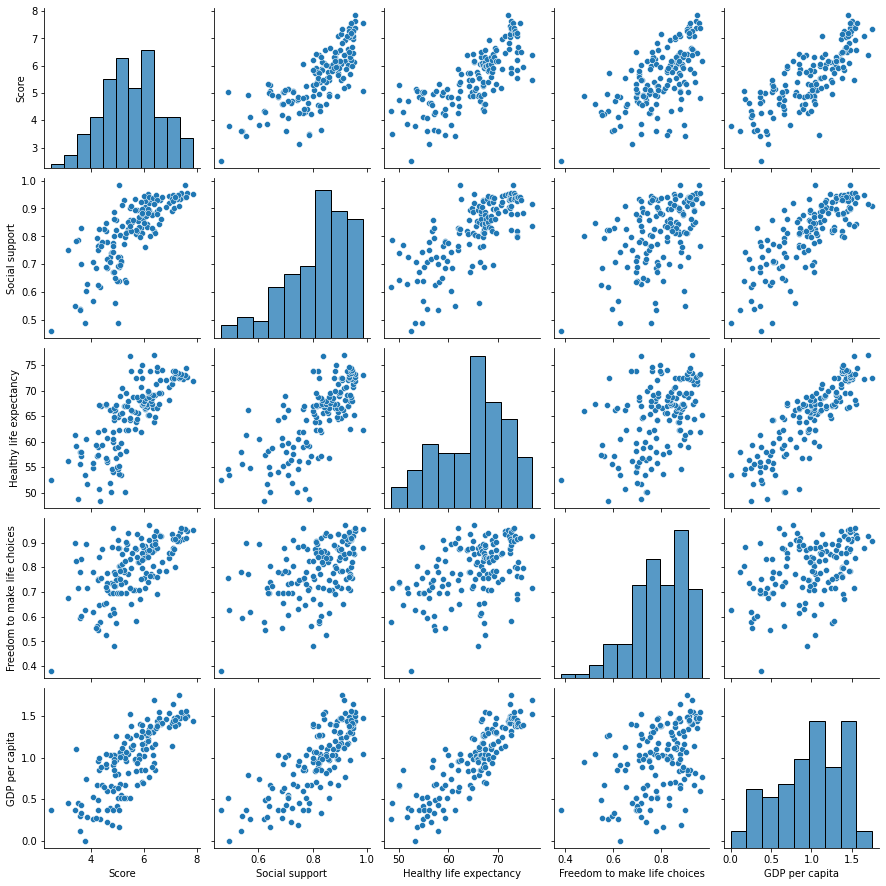

In [ ]:
plt.figure(figsize=(10,6))
sns.pairplot(df_corr)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


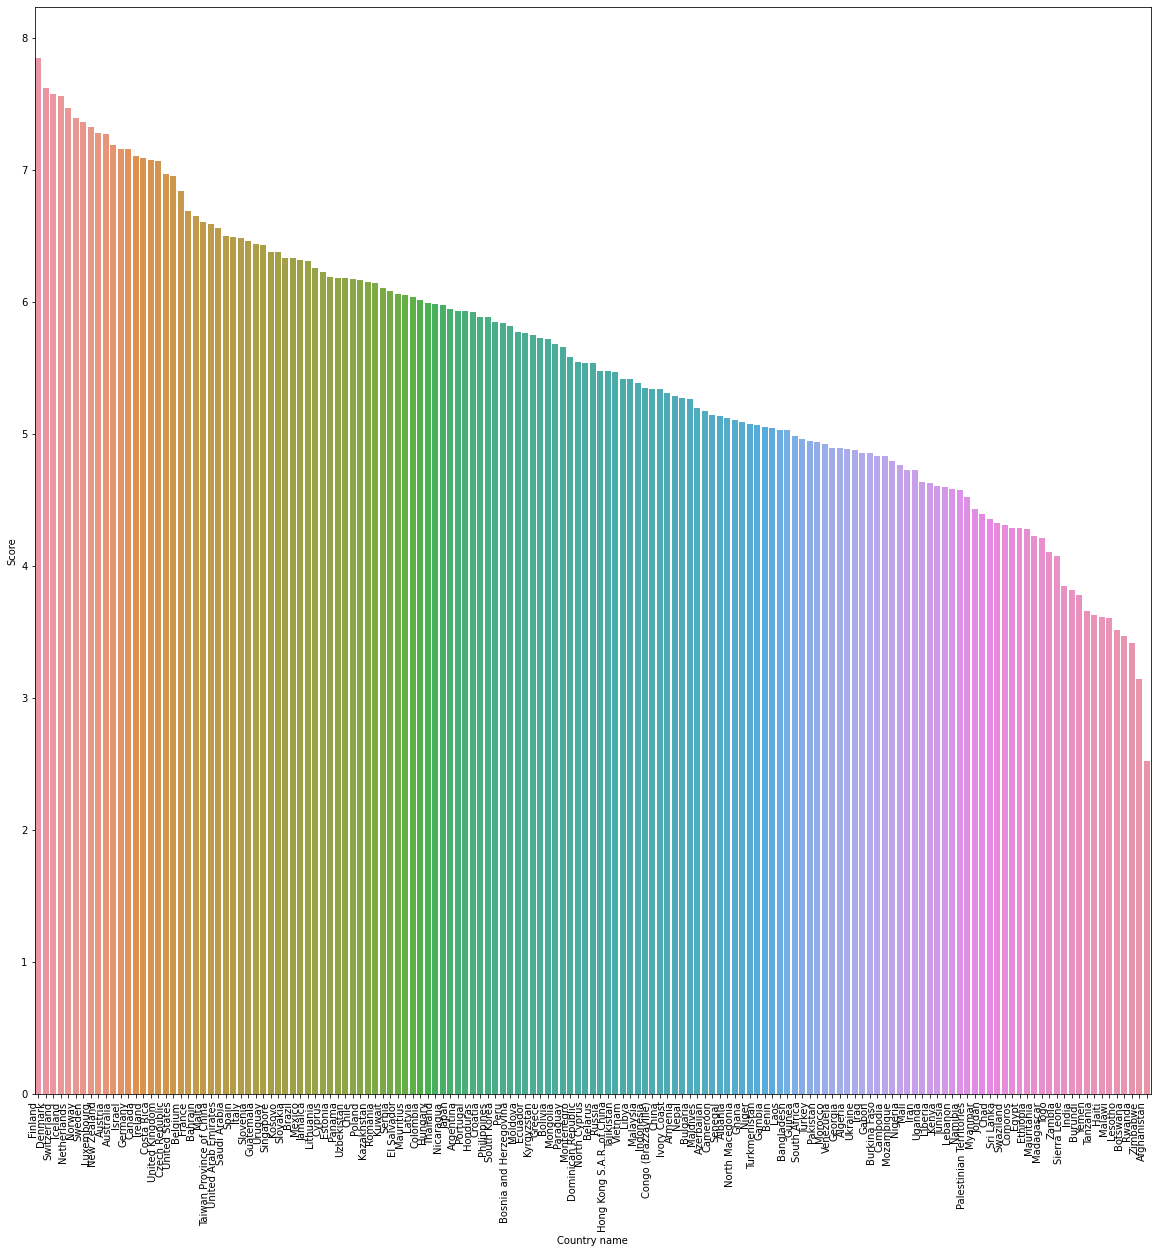

In [ ]:
plt.figure(figsize=(20,20))
ax = sns.barplot(df['Country name'], df['Score'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [ ]:
df_life_exp=df.sort_values(['Healthy life expectancy'])
df_life_exp

,Overall rank,Country name,Region,Score,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,GDP per capita
127,128,Chad,Sub-Saharan Africa,4.3554,0.619300,48.478001,0.578627,0.041342,0.806908,0.254584
144,145,Lesotho,Sub-Saharan Africa,3.5118,0.786871,48.700001,0.714954,-0.130536,0.915377,0.450848
115,116,Nigeria,Sub-Saharan Africa,4.7593,0.740080,50.101826,0.737416,0.037397,0.878421,0.662915
84,85,Ivory Coast,Sub-Saharan Africa,5.3060,0.644098,50.113598,0.741463,-0.016492,0.794468,0.669316
129,130,Swaziland,Sub-Saharan Africa,4.3081,0.770290,50.833141,0.646822,-0.184864,0.708263,0.848926
...,...,...,...,...,...,...,...,...,...,...
2,3,Switzerland,Western Europe,7.5715,0.941742,74.400101,0.918788,0.024629,0.291698,1.565899
26,27,Spain,Western Europe,6.4907,0.931581,74.699997,0.761367,-0.081139,0.745278,1.374962
55,56,Japan,East Asia,5.9405,0.883942,75.100441,0.795744,-0.258194,0.637886,1.389140
76,77,Hong Kong S.A.R. of China,East Asia,5.4767,0.835781,76.820091,0.716808,0.067344,0.402650,1.525004


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


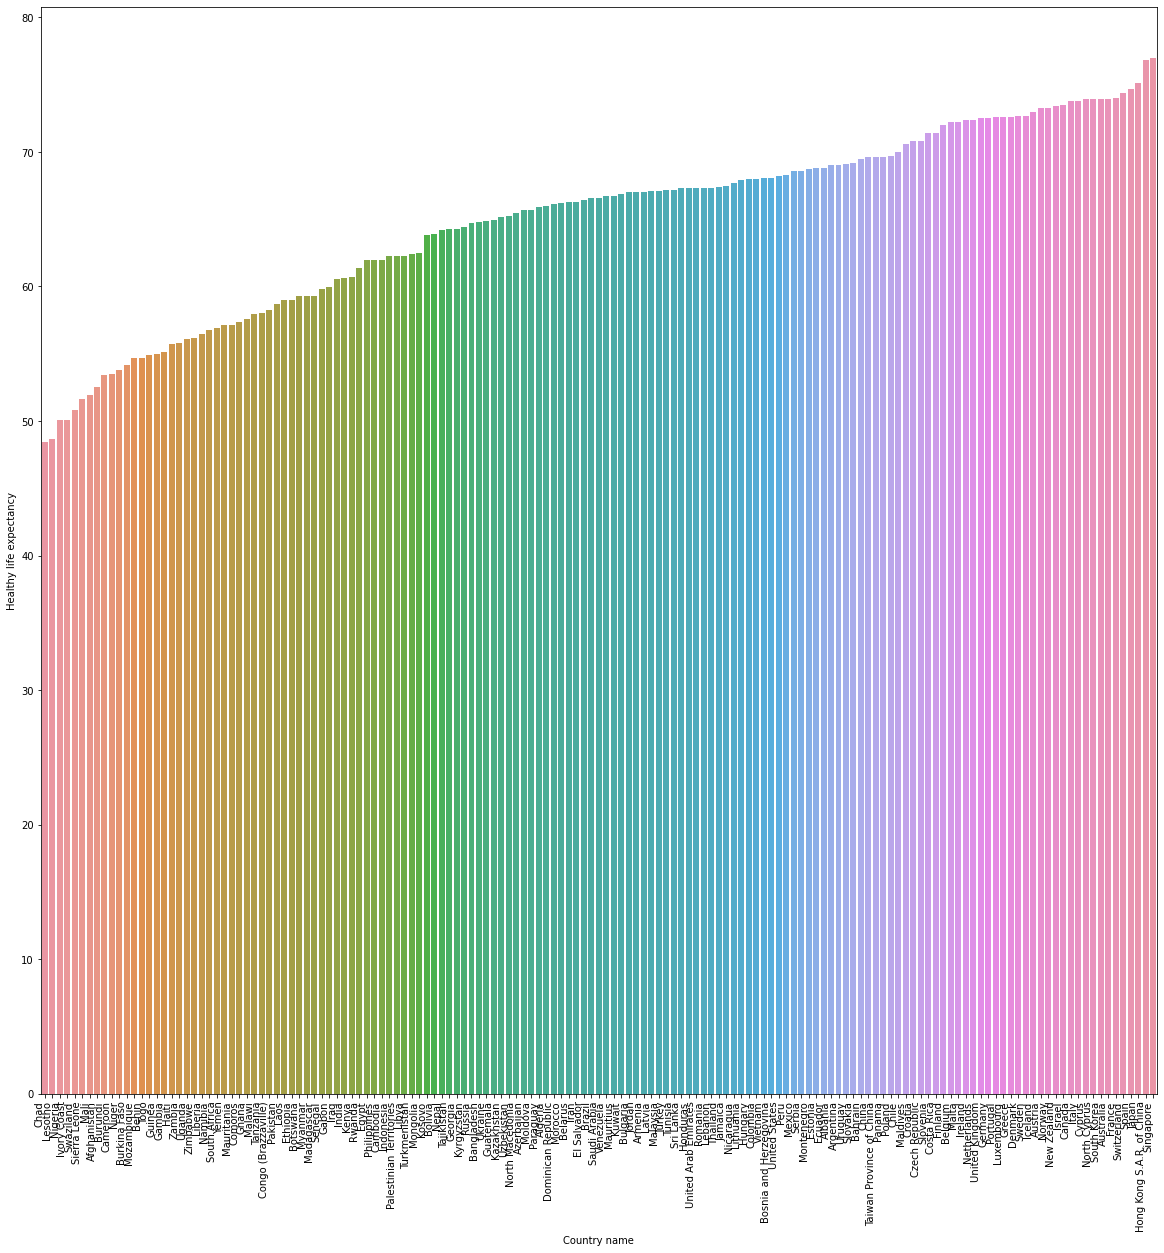

In [ ]:
plt.figure(figsize=(20,20))
ax = sns.barplot(df_life_exp['Country name'], df_life_exp['Healthy life expectancy'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [ ]:
df['Region'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [ ]:
for region in df['Region'].unique():
    print(len(df[df['Region'] == region]), region)

21 Western Europe
4 North America and ANZ
17 Middle East and North Africa
20 Latin America and Caribbean
17 Central and Eastern Europe
6 East Asia
9 Southeast Asia
12 Commonwealth of Independent States
36 Sub-Saharan Africa
7 South Asia


In [ ]:
row_list=[]
for region in df['Region'].unique():
    happinessRankSum=df.loc[df['Region']==region]['Overall rank'].sum()
    numCountriesInRegion=len(df.loc[df['Region']==region])
    averageHappinessScorePerRegion=happinessRankSum/numCountriesInRegion
    dict1 = {'Region': region, 'Happiness Rank Per Region': averageHappinessScorePerRegion, 'numCountriesInRegion': numCountriesInRegion}
    row_list.append(dict1)

In [ ]:
row_list

[{'Happiness Rank Per Region': 21.38095238095238,
  'Region': 'Western Europe',
  'numCountriesInRegion': 21},
 {'Happiness Rank Per Region': 13.25,
  'Region': 'North America and ANZ',
  'numCountriesInRegion': 4},
 {'Happiness Rank Per Region': 90.0,
  'Region': 'Middle East and North Africa',
  'numCountriesInRegion': 17},
 {'Happiness Rank Per Region': 56.65,
  'Region': 'Latin America and Caribbean',
  'numCountriesInRegion': 20},
 {'Happiness Rank Per Region': 53.23529411764706,
  'Region': 'Central and Eastern Europe',
  'numCountriesInRegion': 17},
 {'Happiness Rank Per Region': 62.166666666666664,
  'Region': 'East Asia',
  'numCountriesInRegion': 6},
 {'Happiness Rank Per Region': 81.0,
  'Region': 'Southeast Asia',
  'numCountriesInRegion': 9},
 {'Happiness Rank Per Region': 78.25,
  'Region': 'Commonwealth of Independent States',
  'numCountriesInRegion': 12},
 {'Happiness Rank Per Region': 118.47222222222223,
  'Region': 'Sub-Saharan Africa',
  'numCountriesInRegion': 36},

In [ ]:
df_region=pd.DataFrame(row_list)
df_region

,Region,Happiness Rank Per Region,numCountriesInRegion
0,Western Europe,21.380952,21
1,North America and ANZ,13.250000,4
2,Middle East and North Africa,90.000000,17
3,Latin America and Caribbean,56.650000,20
4,Central and Eastern Europe,53.235294,17
5,East Asia,62.166667,6
6,Southeast Asia,81.000000,9
7,Commonwealth of Independent States,78.250000,12
8,Sub-Saharan Africa,118.472222,36
9,South Asia,114.142857,7


In [ ]:
df_region.sort_values(['Happiness Rank Per Region'], ascending=True, inplace=True)
df_region

,Region,Happiness Rank Per Region,numCountriesInRegion
1,North America and ANZ,13.250000,4
0,Western Europe,21.380952,21
4,Central and Eastern Europe,53.235294,17
3,Latin America and Caribbean,56.650000,20
5,East Asia,62.166667,6
7,Commonwealth of Independent States,78.250000,12
6,Southeast Asia,81.000000,9
2,Middle East and North Africa,90.000000,17
9,South Asia,114.142857,7
8,Sub-Saharan Africa,118.472222,36


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


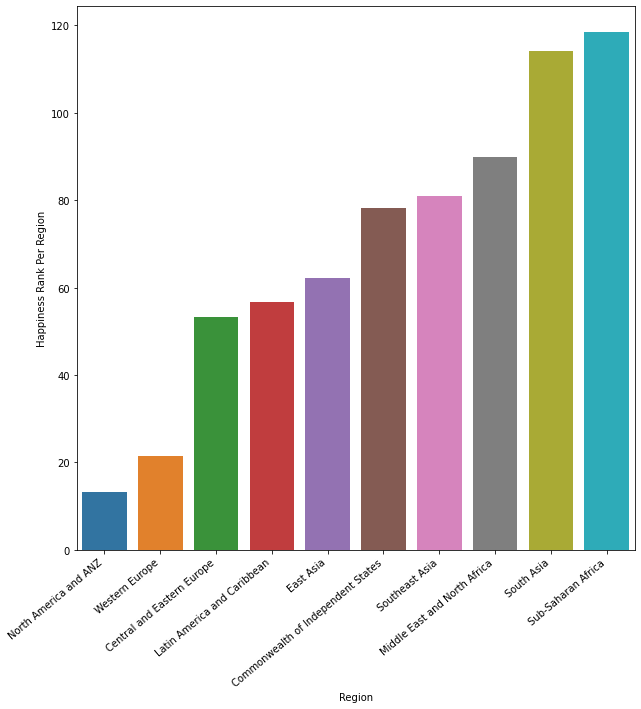

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.barplot(df_region['Region'], df_region['Happiness Rank Per Region'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [ ]:
happy=df.groupby(['Region'])['Score'].mean()
happy_region=pd.DataFrame(data=happy)
happy_region=happy_region.sort_values(['Score'],ascending=False,axis=0)
happy_region

,Score
Region,
North America and ANZ,7.128725
Western Europe,6.914862
Central and Eastern Europe,5.984677
Latin America and Caribbean,5.908035
East Asia,5.810567
Commonwealth of Independent States,5.466958
Southeast Asia,5.407467
Middle East and North Africa,5.219712
Sub-Saharan Africa,4.494544


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


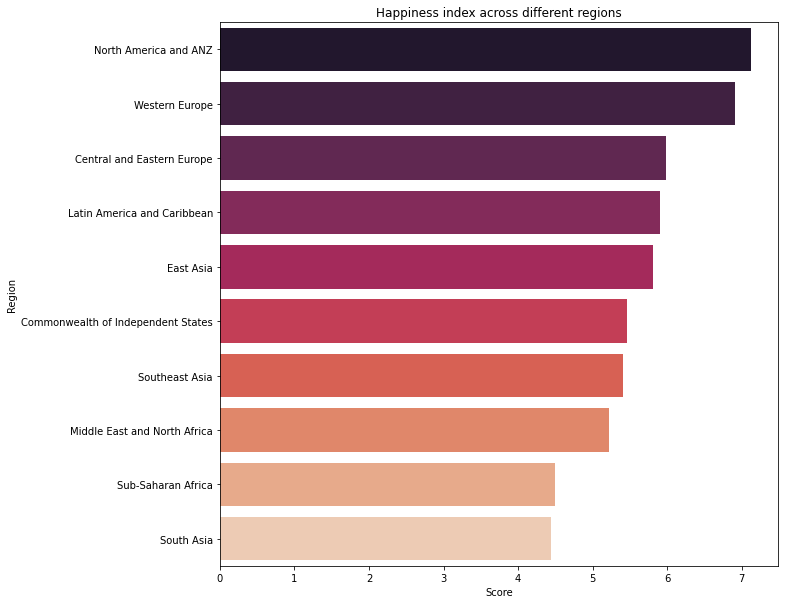

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Happiness index across different regions')
ax = sns.barplot(happy_region['Score'],happy_region.index,palette='rocket')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [ ]:
gdp=df.groupby(['Region'])['GDP per capita'].mean()
gdp_region=pd.DataFrame(data=gdp)
gdp_region=gdp_region.sort_values(['GDP per capita'],ascending=False,axis=0)
gdp_region

,GDP per capita
Region,
Western Europe,1.462952
North America and ANZ,1.458302
East Asia,1.304022
Central and Eastern Europe,1.213633
Middle East and North Africa,1.058853
Southeast Asia,0.973394
Commonwealth of Independent States,0.966553
Latin America and Caribbean,0.955441
South Asia,0.715292


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


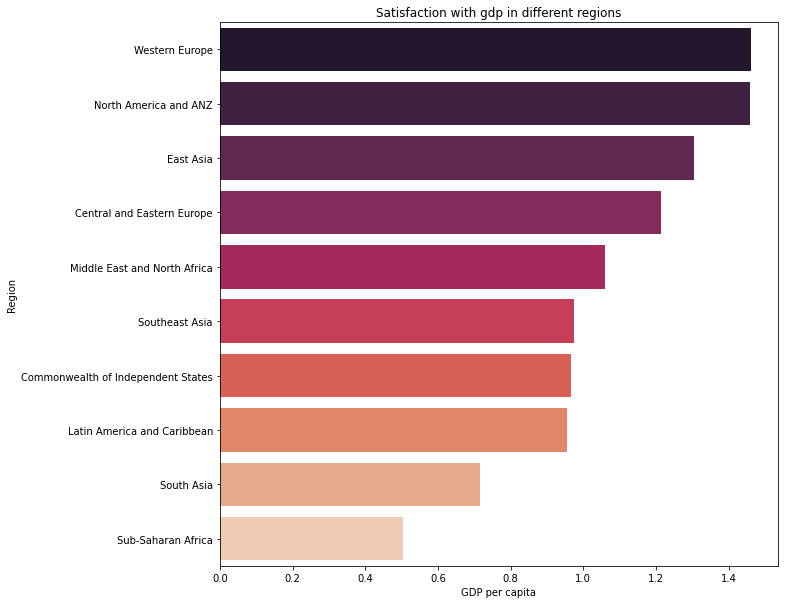

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Satisfaction with gdp in different regions')
ax = sns.barplot(gdp_region['GDP per capita'],gdp_region.index,palette='rocket')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [ ]:
free=df.groupby(['Region'])['Freedom to make life choices'].mean()
freedom_region=pd.DataFrame(data=free)
freedom_region=freedom_region.sort_values(['Freedom to make life choices'],ascending=False,axis=0)
freedom_region

,Freedom to make life choices
Region,
Southeast Asia,0.908843
North America and ANZ,0.898467
Western Europe,0.858699
Latin America and Caribbean,0.831764
Commonwealth of Independent States,0.816850
Central and Eastern Europe,0.797012
South Asia,0.765049
East Asia,0.763474
Sub-Saharan Africa,0.723219


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


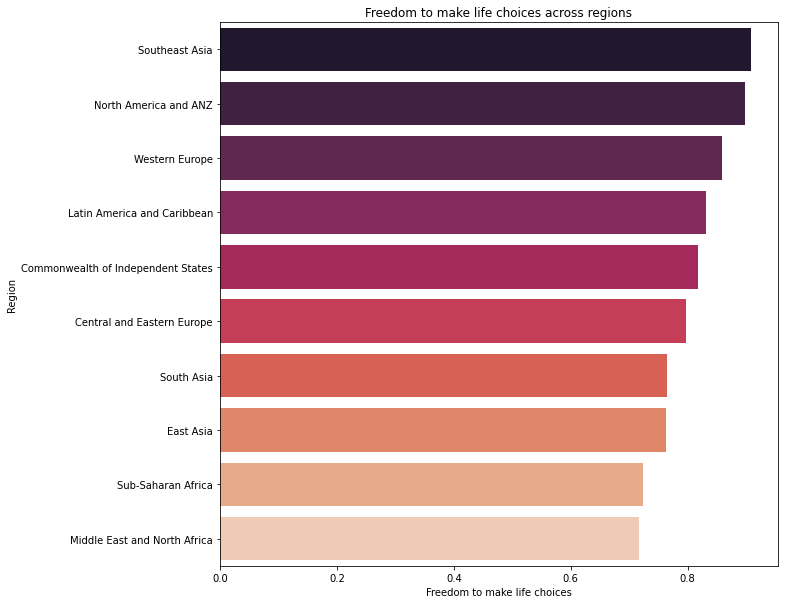

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Freedom to make life choices across regions')
ax = sns.barplot(freedom_region['Freedom to make life choices'],freedom_region.index,palette='rocket')

plt.show()

In [ ]:
exp=df.groupby(['Region'])['Healthy life expectancy'].mean()
exp_region=pd.DataFrame(data=exp)
exp_region=exp_region.sort_values(['Healthy life expectancy'],ascending=False,axis=0)
exp_region

,Healthy life expectancy
Region,
Western Europe,73.033045
North America and ANZ,72.324976
East Asia,71.252319
Central and Eastern Europe,68.338481
Latin America and Caribbean,67.076064
Middle East and North Africa,65.609124
Commonwealth of Independent States,65.009371
Southeast Asia,64.888547
South Asia,62.680939


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


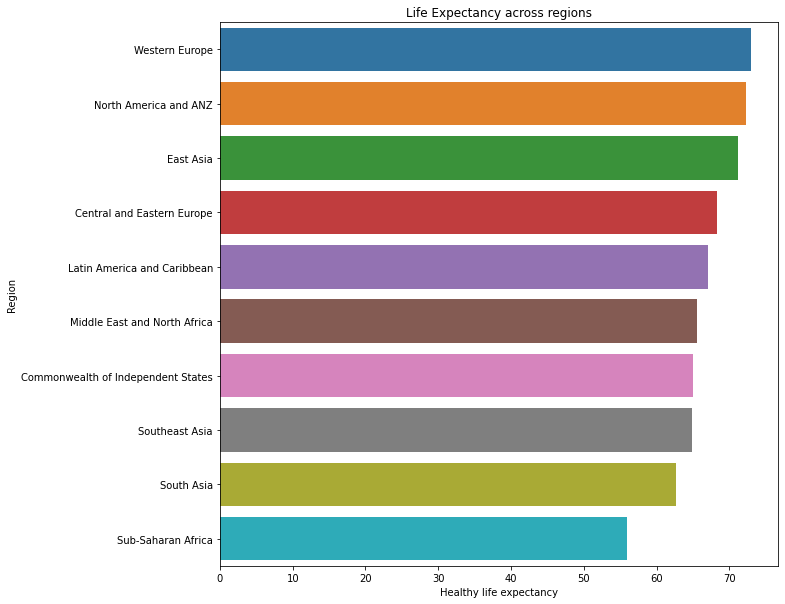

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Life Expectancy across regions')
ax = sns.barplot(exp_region['Healthy life expectancy'],exp_region.index)
plt.show()

In [ ]:
trust=df.groupby(['Region'])['Perceptions of corruption'].mean()
trust_region=pd.DataFrame(data=trust)
trust_region=trust_region.sort_values(['Perceptions of corruption'],ascending=False,axis=0)
trust_region

,Perceptions of corruption
Region,
Central and Eastern Europe,0.850666
South Asia,0.797419
Latin America and Caribbean,0.792562
Sub-Saharan Africa,0.765918
Middle East and North Africa,0.762269
Commonwealth of Independent States,0.725070
Southeast Asia,0.709257
East Asia,0.683470
Western Europe,0.523159


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


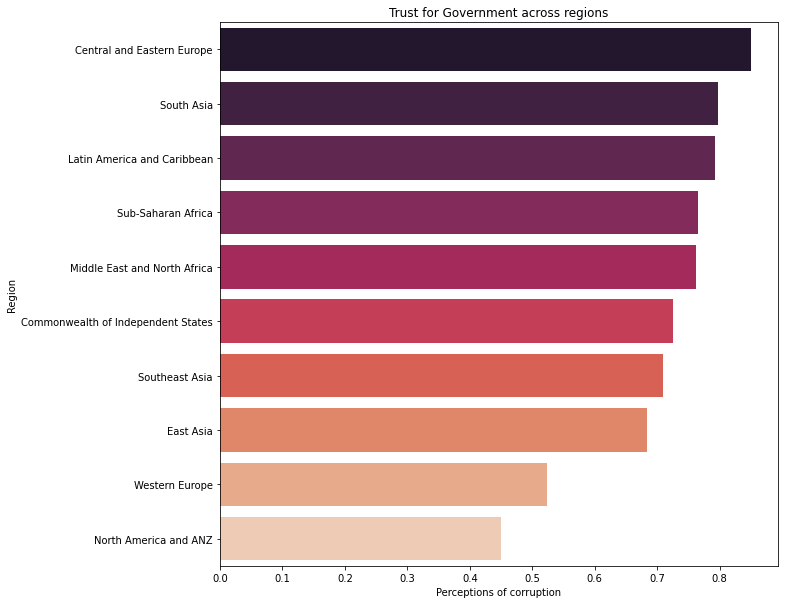

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Trust for Government across regions')
ax = sns.barplot(trust_region['Perceptions of corruption'],trust_region.index,palette='rocket')
plt.show()